<a href="https://colab.research.google.com/github/AhmetA75/CEV-BEBKA-VBE-WEEK-12-Dimensionally-Reduction-/blob/main/CEV_BEBKA_VBE_Week_11_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TASK 12(D-E)




In [59]:
! pip install yellowbrick ;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import pandas as pd
import numpy as np
data = pd.read_excel("CDR_6_MRI_selected.xlsx")
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from time import time
import warnings as warn

In [61]:
data

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,1,2,1.0,1.0,1.0,1.0,1.0,1,2,7,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,2,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [62]:
warn.simplefilter("ignore")

In [63]:
y = data["CDRGLOB"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1595    0
1596    0
1597    2
1598    0
1599    1
Name: CDRGLOB, Length: 1600, dtype: int64

In [64]:
X = data.iloc[:,16:]
X

,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,LCUNM,LENT,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,0.000522,0.006573,0.863848,0.012068,0.150552,0.058912,0.092326,0.108719,0.001518,0.003762,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,0.000457,0.006276,0.863232,0.010662,0.165166,0.049651,0.089356,0.105296,0.001289,0.003348,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,0.007150,0.006077,0.886453,0.010202,0.152706,0.061638,0.093899,0.119795,0.001303,0.003889,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,0.000000,0.005425,0.863620,0.007963,0.169945,0.064592,0.095552,0.121245,0.001231,0.003320,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,0.000074,0.006182,0.867648,0.006463,0.162207,0.051860,0.081467,0.109761,0.001065,0.003648,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.001382,0.005437,0.924830,0.056812,0.196269,0.068208,0.108297,0.119517,0.001314,0.004415,...,0.001671,0.003623,0.004062,0.004795,0.079718,0.027704,0.050209,1.752248,1.103610,0.608947
1596,0.010606,0.005510,0.903673,0.066296,0.183802,0.060576,0.102371,0.122300,0.001304,0.004019,...,0.001556,0.002941,0.002707,0.002837,0.090957,0.029977,0.053822,2.018954,1.194670,0.665390
1597,0.016979,0.005962,0.866307,0.090262,0.176291,0.054202,0.091823,0.118989,0.001406,0.004073,...,0.001389,0.003687,0.002828,0.001960,0.109992,0.033818,0.064928,2.195281,1.295854,0.674956
1598,0.026405,0.006427,0.917510,0.070956,0.189444,0.056817,0.100611,0.119406,0.000983,0.003965,...,0.001748,0.003810,0.004254,0.003466,0.113124,0.033928,0.063884,2.101571,1.186804,0.630296


In [65]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z_tsne = tsne.fit_transform(X) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.199s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.035787
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.883507
[t-SNE] KL divergence after 1000 iterations: 0.866759


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
kmeans = KMeans(n_clusters=4  , random_state=0) # According to elbow method i reduced n_clusters = 3 instead of 4
clusters = kmeans.fit_predict(data_scaled)


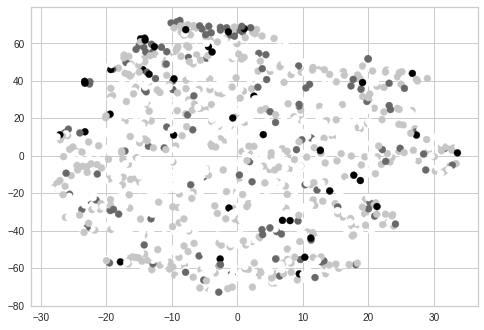

In [ ]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], alpha=1, c=y);

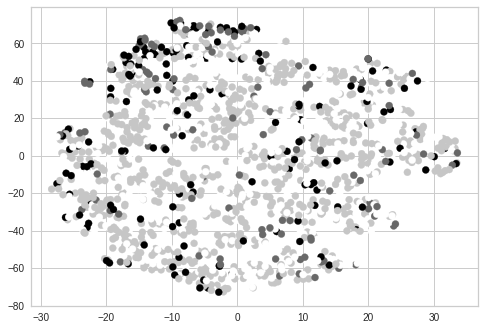

In [ ]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], alpha=1, c=clusters);

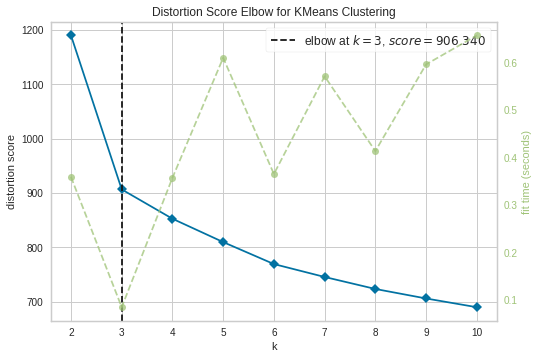

In [ ]:

elb_visualizer = KElbowVisualizer(kmeans, k=(2,11))
elb_visualizer.fit(data_scaled)    
elb_visualizer.show()  ;

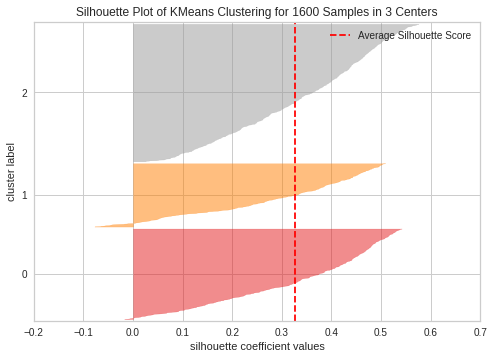

In [ ]:
model_3clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(X)    
sil_visualizer.show();